# Laboratório 4 - Regressão rígida e LASSO

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

Carregando dados.

In [6]:
manufact_costs = sm.datasets.get_rdataset("ManufactCosts", "AER").data
X = manufact_costs.drop(columns=['cost'])
y = manufact_costs['cost']

Divisão dos dados em treino e teste.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=45)

## Modelagem via regressão rígida.

In [10]:
ridge_lambdas = 10**np.linspace(10,-2,100)
ridge_model = Ridge()

ridge_coefs = []
for a in ridge_alphas:
  ridge_model.set_params(alpha=a)
  ridge_model.fit(X_train, y_train)
  ridge_coefs.append(ridge_model.coef_)

Plotando os coeficientes em função de lambda.

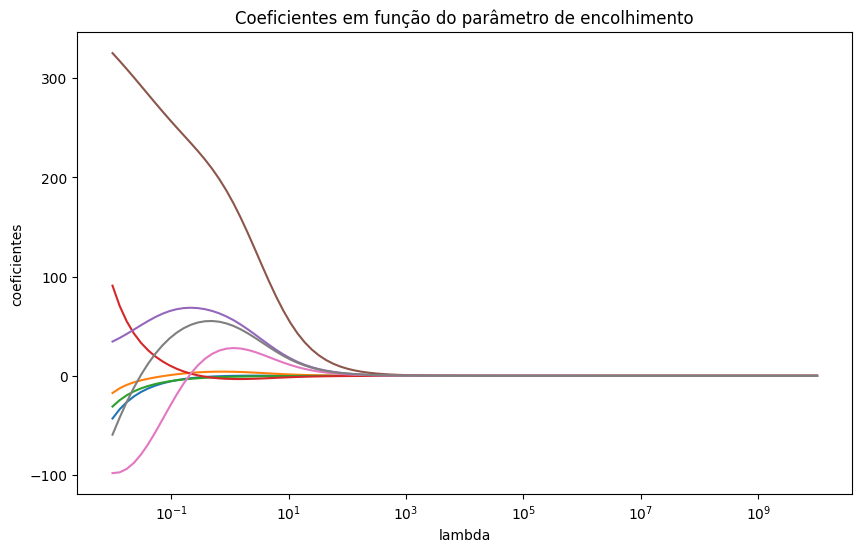

In [14]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.plot(ridge_lambdas, ridge_coefs)
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('coeficientes')
plt.title('Coeficientes em função do parâmetro de encolhimento')
plt.show()

Função de métricas de desempenho.

In [15]:
def metrics(obs, pred):
    rmse = np.sqrt(mean_squared_error(obs, pred))
    mae = mean_absolute_error(obs, pred)
    r2 = r2_score(obs, pred)
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

Desempenho com lambda = 0.02.

In [16]:
ridge_model.set_params(alpha=0.02)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
print("Desempenho com lambda = 0.02:")
print(metrics(y_test, ridge_pred))

Desempenho com lambda = 0.02:
{'RMSE': 19.701739337338694, 'MAE': 16.208101391483947, 'R2': 0.9780966536051833}


Desempenho com lambda = 0 (regressão múltipla).

In [17]:
ridge_model.set_params(alpha=0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
print("\nDesempenho com lambda = 0 (regressão múltipla):")
print(metrics(y_test, ridge_pred))


Desempenho com lambda = 0 (regressão múltipla):
{'RMSE': 31.097489896005865, 'MAE': 21.79749675070764, 'R2': 0.9454302449325027}


Desempenho com lambda ~ inf (modelo com coefs nulos).

In [18]:
ridge_model.set_params(alpha=1e10)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
print("\nDesempenho com lambda ~ inf (modelo com coefs nulos):")
print(metrics(y_test, ridge_pred))


Desempenho com lambda ~ inf (modelo com coefs nulos):
{'RMSE': 160.00286371764656, 'MAE': 124.79737816631896, 'R2': -0.444630717438119}


Validação cruzada para selecionar lambda.

In [21]:
ridge_cv = RidgeCV(alphas=ridge_alphas, cv=5)
ridge_cv.fit(X_train, y_train)
print("\nLambda ótimo selecionado pela validação cruzada:", ridge_cv.alpha_)


Lambda ótimo selecionado pela validação cruzada: 0.2848035868435805


Desempenho com lambda ótimo.

In [22]:
ridge_model.set_params(alpha=ridge_cv.alpha_)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
print("\nDesempenho com lambda ótimo:")
print(metrics(y_test, ridge_pred))


Desempenho com lambda ótimo:
{'RMSE': 29.101191477356828, 'MAE': 22.20501382679724, 'R2': 0.9522115576911865}


Coeficientes com lambda ótimo.

In [23]:
ridge_coef_optimal = pd.DataFrame(ridge_model.coef_, index=X.columns, columns=['Coeficiente'])
print("\nCoeficientes com lambda ótimo:")
print(ridge_coef_optimal)


Coeficientes com lambda ótimo:
                Coeficiente
capitalcost       -1.634918
laborcost          3.531858
energycost        -2.400837
materialscost      0.482885
capitalprice      68.247225
laborprice       226.432390
energyprice       10.601030
materialsprice    53.754198


Regressão linear múltipla.

In [25]:
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)
lm_pred = lm_model.predict(X_test)
print("\nDesempenho da regressão linear múltipla:")
print(metrics(y_test, lm_pred))


Desempenho da regressão linear múltipla:
{'RMSE': 31.09748989592836, 'MAE': 21.797496750558764, 'R2': 0.9454302449327747}


Fator de inflação de variância (ideal, menor que 5).

In [26]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nFator de inflação de variância:")
print(vif)


Fator de inflação de variância:
         Features          VIF
0     capitalcost  1539.503952
1       laborcost  3291.301125
2      energycost  2662.006505
3   materialscost  1192.200993
4    capitalprice  1659.693401
5      laborprice   475.713712
6     energyprice  1360.141455
7  materialsprice  2195.541635


## Modelo LASSO

Treino do modelo LASSO.

In [53]:
lasso_model = Lasso()

lasso_coefs = []
for a in ridge_lambdas:
  lasso_model.set_params(alpha=a)
  lasso_model.fit(X_train, y_train)
  lasso_coefs.append(lasso_model.coef_)

Plotando os coeficientes do modelo LASSO em função do parâmetro de regularização.

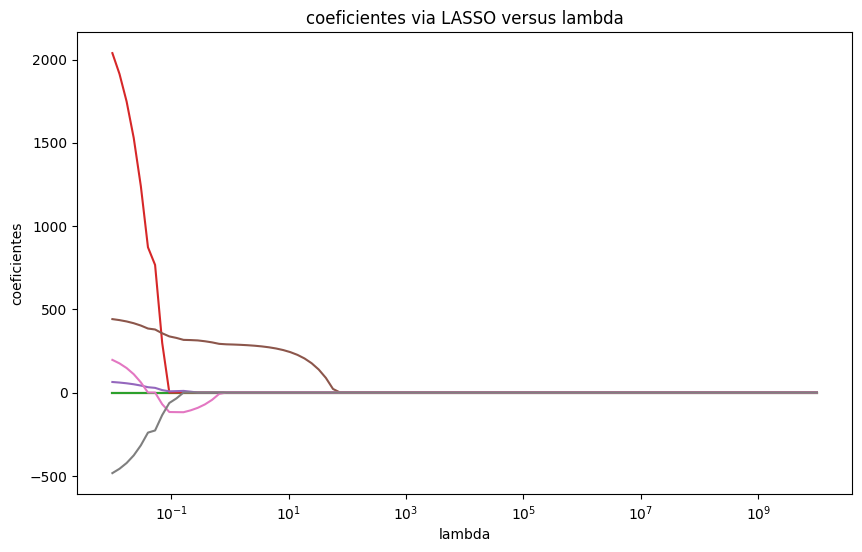

In [54]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.plot(lasso_lambdas, lasso_coefs)
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('coeficientes')
plt.title('coeficientes via LASSO versus lambda')
plt.show()

Desempenho com lambda = 0.02.

In [55]:
lasso_model.set_params(alpha=0.02)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
print("Desempenho do modelo LASSO com lambda = 0.02:")
print(metrics(y_test, lasso_pred))

Desempenho do modelo LASSO com lambda = 0.02:
{'RMSE': 26.141250141588767, 'MAE': 18.736346659703507, 'R2': 0.9614384893259197}


Desempenho com lambda nulo (regressão linear múltipla).

In [56]:
lasso_model.set_params(alpha=0)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
print("\nDesempenho do modelo LASSO com lambda = 0 (regressão linear múltipla):")
print(metrics(y_test, lasso_pred))


Desempenho do modelo LASSO com lambda = 0 (regressão linear múltipla):
{'RMSE': 30.310493410594187, 'MAE': 20.36516519347272, 'R2': 0.9481573317346756}


<ipython-input-56-9e5140526006>:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.419e+02, tolerance: 2.225e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Desempenho com lambda ~ inf (coeficientes nulos).

In [57]:
lasso_model.set_params(alpha=1e10)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
print("\nDesempenho do modelo LASSO com lambda ~ inf (coeficientes nulos):")
print(metrics(y_test, lasso_pred))


Desempenho do modelo LASSO com lambda ~ inf (coeficientes nulos):
{'RMSE': 160.0028637646976, 'MAE': 124.79737820512823, 'R2': -0.4446307182877458}


Validação cruzada para selecionar lambda.

In [59]:
lasso_cv = LassoCV(alphas=lasso_lambdas, cv=5)
lasso_cv.fit(X_train, y_train)
print("\nLambda ótimo selecionado pela validação cruzada:", lasso_cv.alpha_)


Lambda ótimo selecionado pela validação cruzada: 1.1497569953977356


Desempenho do modelo LASSO com lambda ótimo.

In [60]:
lasso_model.set_params(alpha=lasso_cv.alpha_)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
print("\nDesempenho do modelo LASSO com lambda ótimo:")
print(metrics(y_test, lasso_pred))


Desempenho do modelo LASSO com lambda ótimo:
{'RMSE': 23.100200518611775, 'MAE': 18.018067321855305, 'R2': 0.9698884692949495}


Coeficientes do modelo LASSO.

In [61]:
lasso_coef_optimal = pd.DataFrame(lasso_model.coef_, index=X.columns, columns=['Coeficiente'])
print("\nCoeficientes do modelo LASSO:")
print(lasso_coef_optimal)


Coeficientes do modelo LASSO:
                Coeficiente
capitalcost       -0.000000
laborcost         -0.000000
energycost        -0.000000
materialscost      0.000000
capitalprice       0.000000
laborprice       288.273977
energyprice       -0.000000
materialsprice    -0.000000
